Data Preprocessing and Setup

In [10]:
#### setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

#import datsets
temps_data = pd.read_csv('Temperatures_US_Midwest.csv')
precipitation_data = pd.read_csv('Precipitation_US_Midwest.csv')
corn_price_data = pd.read_csv('US_Corn_Futures.csv')
natural_gas = pd.read_csv('Natural_Gas_US.csv')
inflation = pd.read_csv('inflation.csv')
interest_rate = pd.read_csv('FEDFUNDS.csv')

#convert data into numpy arrays
dates = np.array(inflation.iloc[:,2])
temps = temps_data.iloc[:, -1].values
precipitation = precipitation_data.iloc[:, -1].values
natural_gas_prices = np.vstack(np.array(natural_gas.iloc[0,7:]))
inflation = np.flip(np.array(inflation.iloc[:,3]))
interest_rate = np.vstack(np.array(interest_rate.iloc[:,1]))

corn_price = np.array(corn_price_data.iloc[0:, 2].values)

inflation = np.vstack(np.flip(inflation))

#Reshape arrays so that they are in correct format
temps = temps.reshape(len(temps), 1)
precipitation = precipitation.reshape(len(precipitation), 1)
# Could multiply the commidity prices by inflation to scale them, but if we are using 
# inflation as a predicting variable that seems questionable
corn_price = corn_price.reshape(len(corn_price), 1)
natural_gas_prices = natural_gas_prices

# Remove 1990 to match up with natural gas data (only from 1991)
# uncomment if using natural gas data
#precipitation = precipitation[12:]
#temps = temps[12:]
#inflation = inflation[12:]
#interest_rate = interest_rate[12:]

# Combined feature sets
weather = np.column_stack((temps, precipitation))
economic = np.column_stack((inflation, interest_rate))
all_predictors = np.column_stack((temps, precipitation, inflation, interest_rate))

FileNotFoundError: [Errno 2] No such file or directory: 'Natural_Gas_US.csv'

In [863]:
#Split data into training and test
from sklearn.model_selection import train_test_split
# Corn version
temps_train, temps_test, precipitation_train, precipitation_test, weather_train, weather_test, interest_rate_train, interest_rate_test, inflation_train, inflation_test, economic_train, economic_test, all_predictors_train, all_predictors_test, corn_price_train, corn_price_test = train_test_split(temps, precipitation, weather, interest_rate, inflation, economic, all_predictors, corn_price, test_size = 0.2)
# Natural gas version
#temps_train, temps_test, precipitation_train, precipitation_test, weather_train, weather_test, interest_rate_train, interest_rate_test, inflation_train, inflation_test, economic_train, economic_test, all_predictors_train, all_predictors_test, natural_gas_price_train, natural_gas_price_test = train_test_split(temps, precipitation, weather, interest_rate, inflation,  economic, all_predictors, natural_gas_prices, test_size = 0.2)

# This can be changed easily if we want to run regression on the open/high/low price
# Uncomment depending on commodity to be examined.
y_train = corn_price_train
y_test = corn_price_test
#y_train = natural_gas_train
#y_test = natural_gas_test 

Simple Linear Regression for Temperature and Precipitation

In [864]:
from sklearn.linear_model import LinearRegression

# Fit the model
temperature_regressor = LinearRegression()
precipitation_regressor = LinearRegression()
interest_rate_regressor = LinearRegression()
inflation_regressor = LinearRegression()
temperature_regressor.fit(temps_train, y_train)
precipitation_regressor.fit(precipitation_train, y_train)
interest_rate_regressor.fit(interest_rate_train, y_train)
inflation_regressor.fit(inflation_train, y_train)

LinearRegression()

In [865]:
# Get predicted values
y_pred_temps = temperature_regressor.predict(temps_test)
y_pred_precipitation = precipitation_regressor.predict(precipitation_test)
y_pred_interest_rate = interest_rate_regressor.predict(interest_rate_test)
y_pred_inflation = inflation_regressor.predict(inflation_test)

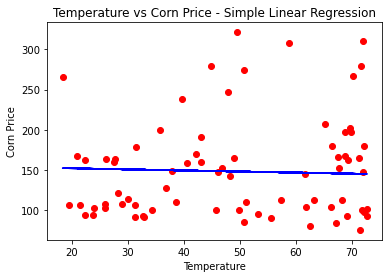

In [879]:
# Plot temperature predictions
plt.scatter(temps_test, y_test, color = 'red')
plt.plot(temps_test, y_pred_temps, color = 'blue')
plt.title('Temperature vs Corn Price - Simple Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Price')
plt.show()

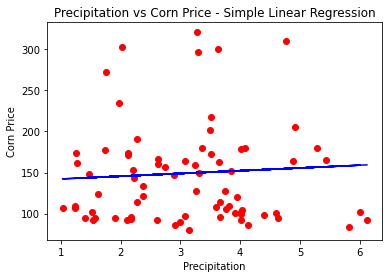

In [815]:
#Plot precipitation predictions
plt.scatter(precipitation_test, y_test, color = 'red')
plt.plot(precipitation_test, y_pred_precipitation, color = 'blue')
plt.title('Precipitation vs Corn Price - Simple Linear Regression')
plt.xlabel('Precipitation')
plt.ylabel('Corn Price')
plt.show()

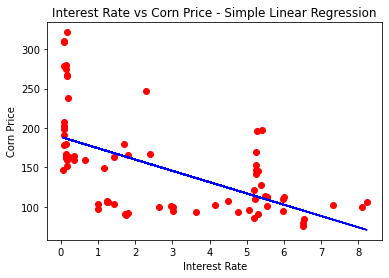

In [881]:
#Plot interest rate predictions
plt.scatter(interest_rate_test, y_test, color = 'red')
plt.plot(interest_rate_test, y_pred_interest_rate, color = 'blue')
plt.title('Interest Rate vs Corn Price - Simple Linear Regression')
plt.xlabel('Interest Rate')
plt.ylabel('Corn Price')
plt.show()

# try making a figure with date on x axis and actual and predicted prices on y axis

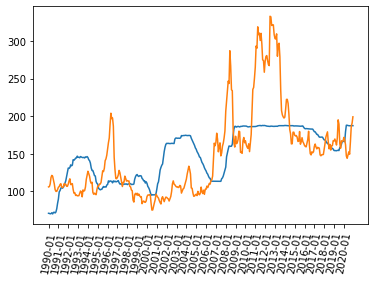

In [882]:
plt.plot(dates, interest_rate_regressor.predict(interest_rate))
plt.plot(dates, corn_price)
plt.xticks(dates[::12], rotation = 80)
plt.show()

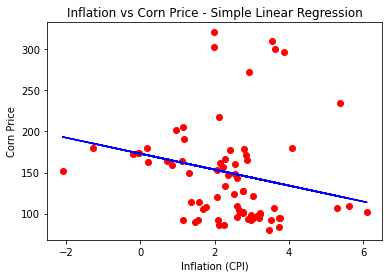

In [817]:
#Plot inflation predictions
plt.scatter(inflation_test, y_test, color = 'red')
plt.plot(inflation_test, y_pred_inflation, color = 'blue')
plt.title('Inflation vs Corn Price - Simple Linear Regression')
plt.xlabel('Inflation (CPI)')
plt.ylabel('Corn Price')
plt.show()

In [818]:
# Evaluating the models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# r2 score of models
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
interest_rate_r2 = r2_score(y_test, y_pred_interest_rate)
inflation_r2 = r2_score(y_test, y_pred_inflation)

#mean squared error of models
temp_mse = mean_squared_error(y_test,  y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
interest_rate_mse = mean_squared_error(y_test, y_pred_interest_rate)
inflation_mse = mean_squared_error(y_test, y_pred_inflation)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
interest_rate_rmse = sqrt(interest_rate_mse)
inflation_rmse = sqrt(inflation_mse)

#mean absolute error of each model
temp_mae = mean_absolute_error(y_test,  y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
interest_rate_mae = mean_absolute_error(y_test, y_pred_interest_rate)
inflation_mae = mean_absolute_error(y_test, y_pred_inflation)

In [819]:
#Print model evaluation
print('R2 values for temperature and precipitation - Simple Linear Regression')
print(temp_r2)
print(precipitation_r2)
print(interest_rate_r2)
print(inflation_r2)

print('Mean Squared Error values for temperature and precipitation - Simple Linear Regression')
print(temp_mse)
print(precipitation_mse)
print(interest_rate_mse)
print(inflation_mse)

print('Root of Mean Squared Error for temperature and precipitation - Simple Linear Regression')
print(temp_rmse)
print(precipitation_rmse)
print(interest_rate_rmse)
print(inflation_rmse)

print('Mean Absolute Error values for temperature and precipitation - Simple Linear Regression')
print(temp_mae)
print(precipitation_mae)
print(interest_rate_mae)
print(inflation_mae)

R2 values for temperature and precipitation - Simple Linear Regression
-0.018497640509703928
-0.011366437550897057
0.33232432863936534
-0.002432818060076336
Mean Squared Error values for temperature and precipitation - Simple Linear Regression
3535.072253821493
3510.3207799708207
2317.4150302374996
3479.313353804968
Root of Mean Squared Error for temperature and precipitation - Simple Linear Regression
59.456473607349885
59.24796013341574
48.1395370795929
58.985704656339976
Mean Absolute Error values for temperature and precipitation - Simple Linear Regression
46.57447959716256
46.30480759920959
37.49816975138335
43.14475377578997


Multiple Linear Regression with temperature and Precipitation

In [820]:
# Build multilinear regressors on all the weather and economic data and predict results
weather_regressor = LinearRegression()
weather_regressor.fit(weather_train, y_train)

economic_regressor = LinearRegression()
economic_regressor.fit(economic_train, y_train)

all_predictors_regressor = LinearRegression()
all_predictors_regressor.fit(all_predictors_train, y_train)

y_pred_weather = weather_regressor.predict(weather_test)
y_pred_economic = economic_regressor.predict(economic_test)
y_pred_all_predictors = all_predictors_regressor.predict(all_predictors_test)

In [821]:
# Evaluating the models

# r2 score of models
weather_r2 = r2_score(y_test, y_pred_weather)
economic_r2 = r2_score(y_test, y_pred_economic)
all_predictors_r2 = r2_score(y_test, y_pred_all_predictors)

#mean squared error of models
weather_mse = mean_squared_error(y_test, y_pred_weather)
economic_mse = mean_squared_error(y_test, y_pred_weather)
all_predictors_mse = mean_squared_error(y_test, y_pred_all_predictors)

weather_rmse = sqrt(weather_mse)
economic_rmse = sqrt(economic_mse)
all_predictors_rmse = sqrt(all_predictors_mse)

#mean absolute error of models
weather_mae = mean_absolute_error(y_test, y_pred_weather)
economic_mae = mean_absolute_error(y_test, y_pred_economic)
all_predictors_mae = mean_absolute_error(y_test, y_pred_all_predictors)

In [822]:
#Print model evaluation
print('R2 values for weather - Multiple Linear Regression')
print(weather_r2)
print(economic_r2)
print(all_predictors_r2)

print('Mean Squared Error values for weather - Multiple Linear Regression')
print(weather_mse)
print(economic_mse)
print(all_predictors_mse)

print('Root of Mean Squared Error for weather - Multiple Linear Regression')
print(weather_rmse)
print(economic_rmse)
print(all_predictors_rmse)

print('Mean Absolute Error values for weather - Multiple Linear Regression')
print(weather_mae)
print(economic_mae)
print(all_predictors_mae)

R2 values for weather - Multiple Linear Regression
-0.06349021862582904
0.39529796004796447
0.36924309393308885
Mean Squared Error values for weather - Multiple Linear Regression
3691.2356146385227
3691.2356146385227
2189.274818965261
Root of Mean Squared Error for weather - Multiple Linear Regression
60.75553978559093
60.75553978559093
46.78968710052741
Mean Absolute Error values for weather - Multiple Linear Regression
47.217995027906454
36.645320751181586
37.136285814603546


Polynomial regression

In [823]:
from sklearn.preprocessing import PolynomialFeatures

#Create the vandermonde matrices for polynomial regression
#We can experiment to find best degree
poly = PolynomialFeatures(degree=4)

temp_train_poly = poly.fit_transform(temps_train)
precip_train_poly = poly.fit_transform(precipitation_train)
weather_train_poly = poly.fit_transform(weather_train)
inflation_train_poly = poly.fit_transform(inflation_train)
interest_rate_train_poly = poly.fit_transform(interest_rate_train)
economic_train_poly = poly.fit_transform(economic_train)
all_predictors_train_poly = poly.fit_transform(all_predictors_train)

In [824]:
#Build the polynomial models
temp_polyreg = LinearRegression()
temp_polyreg.fit(temp_train_poly, y_train)

precip_polyreg = LinearRegression()
precip_polyreg.fit(precip_train_poly, y_train)

weather_polyreg = LinearRegression()
weather_polyreg.fit(weather_train_poly, y_train)

inflation_polyreg = LinearRegression()
inflation_polyreg.fit(inflation_train_poly, y_train)

interest_rate_polyreg = LinearRegression()
interest_rate_polyreg.fit(interest_rate_train_poly, y_train)

economic_polyreg = LinearRegression()
economic_polyreg.fit(economic_train_poly, y_train)

all_predictors_polyreg = LinearRegression()
all_predictors_polyreg.fit(all_predictors_train_poly, y_train)

LinearRegression()

In [825]:
#Get the predictions
y_pred_temps = temp_polyreg.predict(poly.fit_transform(temps_test))
y_pred_precipitation = precip_polyreg.predict(poly.fit_transform(precipitation_test))
y_pred_weather = weather_polyreg.predict(poly.fit_transform(weather_test))
y_pred_inflation = inflation_polyreg.predict(poly.fit_transform(inflation_test))
y_pred_interest_rate = interest_rate_polyreg.predict(poly.fit_transform(interest_rate_test))
y_pred_economic = economic_polyreg.predict(poly.fit_transform(economic_test))
y_pred_all_predictors = all_predictors_polyreg.predict(poly.fit_transform(all_predictors_test))

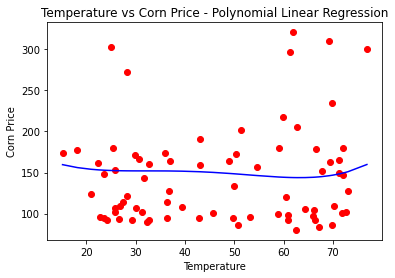

In [826]:
#Plot the temperature polynomial regression
plt.scatter(temps_test, y_test, color = 'red')
idx = np.argsort(temps_test.flatten())
plt.plot(temps_test[idx], temp_polyreg.predict(poly.fit_transform(temps_test))[idx], color = 'blue')
plt.title('Temperature vs Corn Price - Polynomial Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Price')
plt.show()

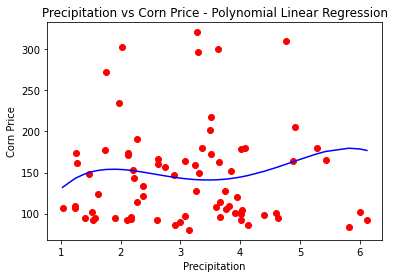

In [827]:
#Plot the precipitation polynomial regression
plt.scatter(precipitation_test, y_test, color = 'red')
idx = np.argsort(precipitation_test.flatten())
plt.plot(precipitation_test[idx], precip_polyreg.predict(poly.fit_transform(precipitation_test))[idx], color = 'blue')
plt.title('Precipitation vs Corn Price - Polynomial Linear Regression')
plt.xlabel('Precipitation')
plt.ylabel('Corn Price')
plt.show()

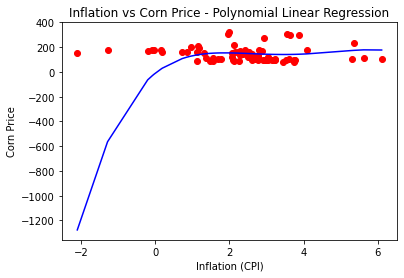

In [828]:
#Plot the inflation polynomial regression
plt.scatter(inflation_test, y_test, color = 'red')
idx = np.argsort(inflation_test.flatten())
plt.plot(inflation_test[idx], precip_polyreg.predict(poly.fit_transform(inflation_test))[idx], color = 'blue')
plt.title('Inflation vs Corn Price - Polynomial Linear Regression')
plt.xlabel('Inflation (CPI)')
plt.ylabel('Corn Price')
plt.show()

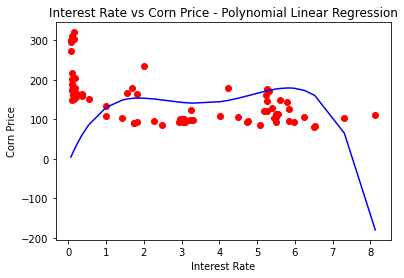

In [829]:
#Plot the interest rate polynomial regression
plt.scatter(interest_rate_test, y_test, color = 'red')
idx = np.argsort(interest_rate_test.flatten())
plt.plot(interest_rate_test[idx], precip_polyreg.predict(poly.fit_transform(interest_rate_test))[idx], color = 'blue')
plt.title('Interest Rate vs Corn Price - Polynomial Linear Regression')
plt.xlabel('Interest Rate')
plt.ylabel('Corn Price')
plt.show()

In [830]:
#Plot the economic predictors polynomial regression
#can maybe do a 3d plot of this later 

In [832]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)
inflation_r2 = r2_score(y_test, y_pred_inflation)
interest_rate_r2 = r2_score(y_test, y_pred_interest_rate)
economic_r2 = r2_score(y_test, y_pred_economic)
all_predictors_r2 = r2_score(y_test, y_pred_all_predictors)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)
inflation_mse = mean_squared_error(y_test, y_pred_inflation)
interest_rate_mse = mean_squared_error(y_test, y_pred_inflation)
economic_mse = mean_squared_error(y_test, y_pred_inflation)
all_predictors_mse = mean_squared_error(y_test, y_pred_inflation)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)
inflation_rmse = sqrt(inflation_mse)
interest_rate_rmse = sqrt(interest_rate_mse)
economic_rmse = sqrt(economic_mse)
all_predictors_rmse = sqrt(economic_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)
inflation_mae = mean_absolute_error(y_test, y_pred_weather)
interest_rate_mae = mean_absolute_error(y_test, y_pred_interest_rate)
economic_mae = mean_absolute_error(y_test, y_pred_economic)
all_predictors_mae = mean_absolute_error(y_test, y_pred_all_predictors)

In [833]:
#Print model evaluation
print('R2 values for predictions - Polynomial Linear Regression')
print("temps r2: " + str(temp_r2))
print("rain r2: " + str(precipitation_r2))
print("weather r2: " + str(weather_r2))
print("inflation r2: " + str(inflation_r2))
print("interest rate: " + str(interest_rate_r2))
print("economic r2: " + str(economic_r2))
print("all r2: " + str(all_predictors_r2))

print('Mean Squared Error values for predictions - Polynomial Linear Regression')
print("temps: " + str(temp_mse))
print("rain: " + str(precipitation_mse))
print("weather: " + str(weather_mse))
print("inflation: " + str(inflation_mse))
print("interest: " + str(interest_rate_mse))
print("economic: " + str(economic_mse))
print("all: " + str(all_predictors_mse))

print('Root of Mean Squared Error for predictions - Polynomial Linear Regression')
print("temp: " + str(temp_rmse))
print("rain: " + str(precipitation_rmse))
print("weather: " + str(weather_rmse))
print("inflation: " + str(inflation_rmse))
print("interest: " + str(interest_rate_rmse))
print("economic: " + str(economic_rmse))
print("all: " + str(all_predictors_rmse))

print('Mean Absolute Error values for predictions - Polynomial Linear Regression')
print("temp: " + str(temp_mae))
print("rain: " + str(precipitation_mae))
print("weather: " + str(weather_mae))
print("inflation: " + str(inflation_mae))
print("interest: " + str(interest_rate_mae))
print("economic: " + str(economic_mae))
print("all: " + str(all_predictors_mae))

R2 values for predictions - Polynomial Linear Regression
temps r2: -0.008060269348688642
rain r2: -0.03703773952236
weather r2: -0.18633866454742543
inflation r2: -0.02760869138103872
interest rate: 0.510019171108631
economic r2: 0.7165151625135728
all r2: 0.024838434456344483
Mean Squared Error values for predictions - Polynomial Linear Regression
temps: 3498.845502058302
rain: 3599.42251541851
weather: 4117.626521528786
inflation: 3566.6955211294994
interest: 3566.6955211294994
economic: 3566.6955211294994
all: 3566.6955211294994
Root of Mean Squared Error for predictions - Polynomial Linear Regression
temp: 59.15103973776202
rain: 59.99518743548111
weather: 64.16873476646384
inflation: 59.72181779826782
interest: 59.72181779826782
economic: 59.72181779826782
all: 59.72181779826782
Mean Absolute Error values for predictions - Polynomial Linear Regression
temp: 46.27694620736794
rain: 46.50130522013475
weather: 49.544379666838935
inflation: 49.544379666838935
interest: 33.762371101098

Ridge Regression

In [834]:
#Build the ridge regression model
from sklearn.linear_model import Ridge
alph = 1

temp_reg = Ridge(alpha=alph)
temp_reg.fit(temps_train, y_train)

precipitation_reg = Ridge(alpha=alph)
precipitation_reg.fit(precipitation_train, y_train)

weather_reg = Ridge(alpha=alph)
weather_reg.fit(weather_train, y_train)

inflation_reg = Ridge(alpha=alph)
inflation_reg.fit(inflation_train, y_train)

interest_rate_reg = Ridge(alpha=alph)
interest_rate_reg.fit(interest_rate_train, y_train)

economic_reg = Ridge(alpha=alph)
economic_reg.fit(economic_train, y_train)

all_predictors_reg = Ridge(alpha=alph)
all_predictors_reg.fit(all_predictors_train, y_train)

Ridge(alpha=1)

In [835]:
#Make the predictions
y_pred_temps = temp_reg.predict(temps_test)
y_pred_precipitation = precipitation_reg.predict(precipitation_test)
y_pred_weather = weather_reg.predict(weather_test)
y_pred_inflation = inflation_reg.predict(inflation_test)
y_pred_interest_rate = interest_rate_reg.predict(interest_rate_test)
y_pred_economic = economic_reg.predict(economic_test)
y_pred_all_predictors = all_predictors_reg.predict(all_predictors_test)

In [837]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)
inflation_r2 = r2_score(y_test, y_pred_inflation)
interest_rate_r2 = r2_score(y_test, y_pred_interest_rate)
economic_r2 = r2_score(y_test, y_pred_economic)
all_predictors_r2 = r2_score(y_test, y_pred_all_predictors)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)
inflation_mse = mean_squared_error(y_test, y_pred_inflation)
interest_rate_mse = mean_squared_error(y_test, y_pred_inflation)
economic_mse = mean_squared_error(y_test, y_pred_inflation)
all_predictors_mse = mean_squared_error(y_test, y_pred_inflation)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)
inflation_rmse = sqrt(inflation_mse)
interest_rate_rmse = sqrt(interest_rate_mse)
economic_rmse = sqrt(economic_mse)
all_predictors_rmse = sqrt(economic_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)
inflation_mae = mean_absolute_error(y_test, y_pred_weather)
interest_rate_mae = mean_absolute_error(y_test, y_pred_interest_rate)
economic_mae = mean_absolute_error(y_test, y_pred_economic)
all_predictors_mae = mean_absolute_error(y_test, y_pred_all_predictors)

In [838]:
#Print model evaluation
print('R2 values for predictions - Ridge Regression')
print("temps r2: " + str(temp_r2))
print("rain r2: " + str(precipitation_r2))
print("weather r2: " + str(weather_r2))
print("inflation r2: " + str(inflation_r2))
print("interest rate: " + str(interest_rate_r2))
print("economic r2: " + str(economic_r2))
print("all r2: " + str(all_predictors_r2))

print('Mean Squared Error values for predictions - Ridge Regression')
print("temps: " + str(temp_mse))
print("rain: " + str(precipitation_mse))
print("weather: " + str(weather_mse))
print("inflation: " + str(inflation_mse))
print("interest: " + str(interest_rate_mse))
print("economic: " + str(economic_mse))
print("all: " + str(all_predictors_mse))

print('Root of Mean Squared Error for predictions - Ridge Regression')
print("temp: " + str(temp_rmse))
print("rain: " + str(precipitation_rmse))
print("weather: " + str(weather_rmse))
print("inflation: " + str(inflation_rmse))
print("interest: " + str(interest_rate_rmse))
print("economic: " + str(economic_rmse))
print("all: " + str(all_predictors_rmse))

print('Mean Absolute Error values for predictions - Ridge Regression')
print("temp: " + str(temp_mae))
print("rain: " + str(precipitation_mae))
print("weather: " + str(weather_mae))
print("inflation: " + str(inflation_mae))
print("interest: " + str(interest_rate_mae))
print("economic: " + str(economic_mae))
print("all: " + str(all_predictors_mae))

R2 values for predictions - Ridge Regression
temps r2: -0.018497481812206562
rain r2: -0.01134436400116634
weather r2: -0.06329364186095332
inflation r2: -0.0023222330733392305
interest rate: 0.332316558652085
economic r2: 0.3952019923389949
all r2: 0.36921190273165594
Mean Squared Error values for predictions - Ridge Regression
temps: 3535.071703003212
rain: 3510.244165563391
weather: 3690.5533223684
inflation: 3478.9295277628107
interest: 3478.9295277628107
economic: 3478.9295277628107
all: 3478.9295277628107
Root of Mean Squared Error for predictions - Ridge Regression
temp: 59.45646897523609
rain: 59.24731357254429
weather: 60.74992446389049
inflation: 58.982451015219866
interest: 58.982451015219866
economic: 58.982451015219866
all: 58.982451015219866
Mean Absolute Error values for predictions - Ridge Regression
temp: 46.574476234535034
rain: 46.304774860764674
weather: 47.21464730535925
inflation: 47.21464730535925
interest: 37.49484562693965
economic: 36.63398476722231
all: 37.12

Support Vector Regression

In [839]:
# Support Vector Regression requires feature scaling for accurate predictions
# Pretty much just standardizing the data so it's all in the bound [-3, 3]
from sklearn.preprocessing import StandardScaler

sc_temps = StandardScaler()
sc_precipitation = StandardScaler()
sc_weather = StandardScaler()
sc_inflation = StandardScaler()
sc_interest_rate = StandardScaler()
sc_economic = StandardScaler()
sc_all_predictors = StandardScaler()
sc_y = StandardScaler()

temps_scaled = sc_temps.fit_transform(temps_train)
precipitation_scaled = sc_precipitation.fit_transform(precipitation_train)
weather_scaled = sc_weather.fit_transform(weather_train)
inflation_scaled = sc_inflation.fit_transform(inflation_train)
interest_rate_scaled = sc_interest_rate.fit_transform(interest_rate_train)
economic_scaled = sc_economic.fit_transform(economic_train)
all_predictors_scaled = sc_all_predictors.fit_transform(all_predictors_train)
y_scaled = sc_y.fit_transform(np.vstack(y_train))

In [840]:
#Building the model using the radial basis function kernel in SVR
#Not really sure how the radial basis function kernel works but it does regression
#polynomially and is supposed to be the most popular. We can experiment with other kernels
from sklearn.svm import SVR
temps_reg = SVR(kernel = 'rbf')
precipitation_reg = SVR(kernel = 'rbf')
weather_reg = SVR(kernel = 'rbf')
inflation_reg = SVR(kernel = 'rbf')
interest_rate_reg = SVR(kernel = 'rbf')
economic_reg = SVR(kernel = 'rbf')
all_predictors_reg = SVR(kernel = 'rbf')

temps_reg.fit(temps_scaled, y_scaled)
precipitation_reg.fit(precipitation_scaled, y_scaled)
weather_reg.fit(weather_scaled, y_scaled)
inflation_reg.fit(inflation_scaled, y_scaled)
interest_rate_reg.fit(interest_rate_scaled, y_scaled)
economic_reg.fit(economic_scaled, y_scaled)
all_predictors_reg.fit(all_predictors_scaled, y_scaled)

C:\Users\adamv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\adamv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\adamv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\adamv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

SVR()

In [841]:
# Get the predictions
y_pred_temps = sc_y.inverse_transform(temps_reg.predict(sc_temps.fit_transform(temps_test)))
y_pred_precipitation = sc_y.inverse_transform(precipitation_reg.predict(sc_precipitation.fit_transform(precipitation_test)))
y_pred_weather = sc_y.inverse_transform(weather_reg.predict(sc_weather.fit_transform(weather_test)))
y_pred_inflation = sc_y.inverse_transform(inflation_reg.predict(sc_inflation.fit_transform(inflation_test)))
y_pred_interest_rate = sc_y.inverse_transform(interest_rate_reg.predict(sc_interest_rate.fit_transform(interest_rate_test)))
y_pred_economic = sc_y.inverse_transform(economic_reg.predict(sc_economic.fit_transform(economic_test)))
y_pred_all_predictors = sc_y.inverse_transform(all_predictors_reg.predict(sc_all_predictors.fit_transform(all_predictors_test)))

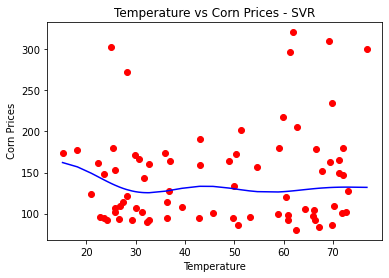

In [842]:
#Plot the temperature results
plt.scatter(temps_test, y_test, color = 'red')
idx = np.argsort(temps_test.flatten())
plt.plot(temps_test[idx], sc_y.inverse_transform(temps_reg.predict(sc_temps.fit_transform(temps_test)))[idx], color = 'blue')
plt.title('Temperature vs Corn Prices - SVR')
plt.xlabel('Temperature')
plt.ylabel(' Corn Prices')
plt.show()

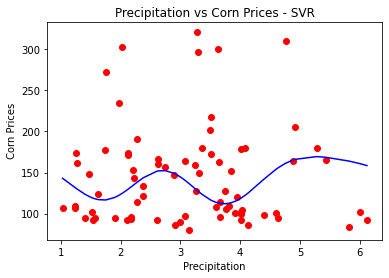

In [843]:
#Plot the precipitation results
plt.scatter(precipitation_test, y_test, color = 'red')
idx = np.argsort(precipitation_test.flatten())
plt.plot(precipitation_test[idx], sc_y.inverse_transform(precipitation_reg.predict(sc_precipitation.fit_transform(precipitation_test)))[idx], color = 'blue')
plt.title('Precipitation vs Corn Prices - SVR')
plt.xlabel('Precipitation')
plt.ylabel(' Corn Prices')
plt.show()

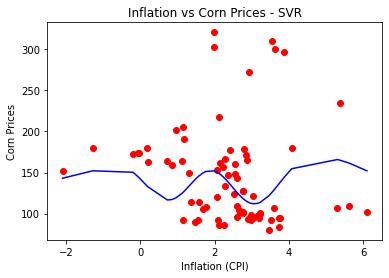

In [844]:
#Plot the inflation results
plt.scatter(inflation_test, y_test, color = 'red')
idx = np.argsort(inflation_test.flatten())
plt.plot(inflation_test[idx], sc_y.inverse_transform(precipitation_reg.predict(sc_precipitation.fit_transform(inflation_test)))[idx], color = 'blue')
plt.title('Inflation vs Corn Prices - SVR')
plt.xlabel('Inflation (CPI)')
plt.ylabel('Corn Prices')
plt.show()

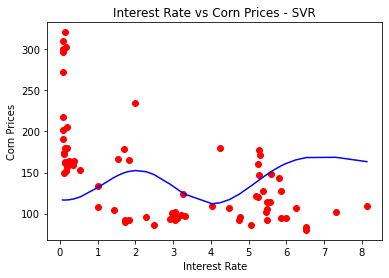

In [845]:
#Plot the interest rate results
plt.scatter(interest_rate_test, y_test, color = 'red')
idx = np.argsort(interest_rate_test.flatten())
plt.plot(interest_rate_test[idx], sc_y.inverse_transform(precipitation_reg.predict(sc_precipitation.fit_transform(interest_rate_test)))[idx], color = 'blue')
plt.title('Interest Rate vs Corn Prices - SVR')
plt.xlabel('Interest Rate')
plt.ylabel('Corn Prices')
plt.show()

In [847]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)
inflation_r2 = r2_score(y_test, y_pred_inflation)
interest_rate_r2 = r2_score(y_test, y_pred_interest_rate)
economic_r2 = r2_score(y_test, y_pred_economic)
all_predictors_r2 = r2_score(y_test, y_pred_all_predictors)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)
inflation_mse = mean_squared_error(y_test, y_pred_inflation)
interest_rate_mse = mean_squared_error(y_test, y_pred_inflation)
economic_mse = mean_squared_error(y_test, y_pred_inflation)
all_predictors_mse = mean_squared_error(y_test, y_pred_inflation)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)
inflation_rmse = sqrt(inflation_mse)
interest_rate_rmse = sqrt(interest_rate_mse)
economic_rmse = sqrt(economic_mse)
all_predictors_rmse = sqrt(economic_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)
inflation_mae = mean_absolute_error(y_test, y_pred_weather)
interest_rate_mae = mean_absolute_error(y_test, y_pred_interest_rate)
economic_mae = mean_absolute_error(y_test, y_pred_economic)
all_predictors_mae = mean_absolute_error(y_test, y_pred_all_predictors)

In [848]:
#Print model evaluation
print('R2 values for predictions - SVR')
print("temps r2: " + str(temp_r2))
print("rain r2: " + str(precipitation_r2))
print("weather r2: " + str(weather_r2))
print("inflation r2: " + str(inflation_r2))
print("interest rate: " + str(interest_rate_r2))
print("economic r2: " + str(economic_r2))
print("all r2: " + str(all_predictors_r2))

print('Mean Squared Error values for predictions - SVR')
print("temps: " + str(temp_mse))
print("rain: " + str(precipitation_mse))
print("weather: " + str(weather_mse))
print("inflation: " + str(inflation_mse))
print("interest: " + str(interest_rate_mse))
print("economic: " + str(economic_mse))
print("all: " + str(all_predictors_mse))

print('Root of Mean Squared Error for predictions - SVR')
print("temp: " + str(temp_rmse))
print("rain: " + str(precipitation_rmse))
print("weather: " + str(weather_rmse))
print("inflation: " + str(inflation_rmse))
print("interest: " + str(interest_rate_rmse))
print("economic: " + str(economic_rmse))
print("all: " + str(all_predictors_rmse))

print('Mean Absolute Error values for predictions - SVR')
print("temp: " + str(temp_mae))
print("rain: " + str(precipitation_mae))
print("weather: " + str(weather_mae))
print("inflation: " + str(inflation_mae))
print("interest: " + str(interest_rate_mae))
print("economic: " + str(economic_mae))
print("all: " + str(all_predictors_mae))

R2 values for predictions - SVR
temps r2: -0.05525685826755655
rain r2: -0.1423296922773365
weather r2: -0.188824428378211
inflation r2: -0.08319012675582615
interest rate: 0.45929466200630054
economic r2: 0.6758136547598581
all r2: 0.497328988009053
Mean Squared Error values for predictions - SVR
temps: 3662.6586964399917
rain: 3964.8771281052195
weather: 4126.254283045607
inflation: 3759.611422164531
interest: 3759.611422164531
economic: 3759.611422164531
all: 3759.611422164531
Root of Mean Squared Error for predictions - SVR
temp: 60.51990330825051
rain: 62.96727029263075
weather: 64.23592673142971
inflation: 61.315670282273935
interest: 61.315670282273935
economic: 61.315670282273935
all: 61.315670282273935
Mean Absolute Error values for predictions - SVR
temp: 44.23929553433852
rain: 44.548740755576794
weather: 46.77698529986493
inflation: 46.77698529986493
interest: 29.964249252849967
economic: 23.299532530471648
all: 31.291273905674025


Decision Tree Regression

In [849]:
#build models with decision tree regression
from sklearn.tree import DecisionTreeRegressor

temps_reg = DecisionTreeRegressor()
precipitation = DecisionTreeRegressor()
weather_reg = DecisionTreeRegressor()
inflation_reg = DecisionTreeRegressor()
interest_rate_reg = DecisionTreeRegressor()
economic_reg = DecisionTreeRegressor()
all_predictors_reg = DecisionTreeRegressor()

temps_reg.fit(temps_train, y_train)
precipitation_reg.fit(precipitation_train, y_train)
weather_reg.fit(weather_train, y_train)
inflation_reg.fit(inflation_train, y_train)
interest_rate_reg.fit(interest_rate_train, y_train)
economic_reg.fit(economic_train, y_train)
all_predictors_reg.fit(all_predictors_train, y_train)

C:\Users\adamv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


DecisionTreeRegressor()

In [850]:
# Get the predictions
y_pred_temps = temps_reg.predict(temps_test)
y_pred_precipitation = precipitation_reg.predict(precipitation_test)
y_pred_weather = weather_reg.predict(weather_test)
y_pred_inflation = inflation_reg.predict(inflation_test)
y_pred_interest_rate = interest_rate_reg.predict(interest_rate_test)
y_pred_economic = economic_reg.predict(economic_test)
y_pred_all_predictors = all_predictors_reg.predict(all_predictors_test)

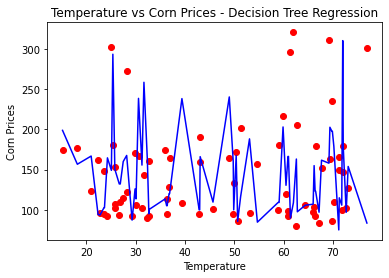

In [851]:
#plot temperature decision tree results
plt.scatter(temps_test, y_test, color = 'red')
idx = np.argsort(temps_test.flatten())
plt.plot(temps_test[idx], temps_reg.predict(temps_test)[idx], color = 'blue')
plt.title('Temperature vs Corn Prices - Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Prices')
plt.show()

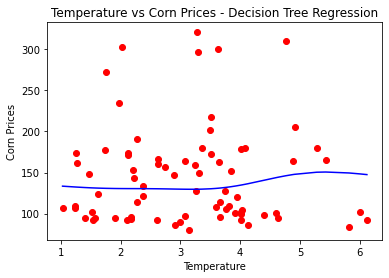

In [852]:
#plot precipitation decision tree results
plt.scatter(precipitation_test, y_test, color = 'red')
idx = np.argsort(precipitation_test.flatten())
plt.plot(precipitation_test[idx], precipitation_reg.predict(precipitation_test)[idx], color = 'blue')
plt.title('Temperature vs Corn Prices - Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Corn Prices')
plt.show()

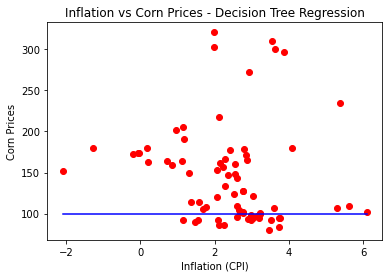

In [853]:
# Plot inflation decision tree results
plt.scatter(inflation_test, y_test, color = 'red')
idx = np.argsort(inflation_test.flatten())
plt.plot(inflation_test[idx], inflation_reg.predict(temps_test)[idx], color = 'blue')
plt.title('Inflation vs Corn Prices - Decision Tree Regression')
plt.xlabel('Inflation (CPI)')
plt.ylabel('Corn Prices')
plt.show()

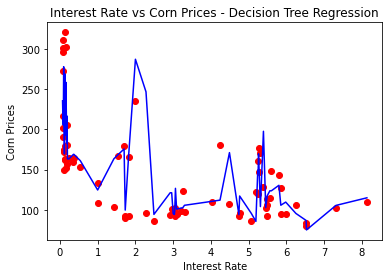

In [854]:
# Plot interest rate decision tree results
plt.scatter(interest_rate_test, y_test, color = 'red')
idx = np.argsort(interest_rate_test.flatten())
plt.plot(interest_rate_test[idx], interest_rate_reg.predict(interest_rate_test)[idx], color = 'blue')
plt.title('Interest Rate vs Corn Prices - Decision Tree Regression')
plt.xlabel('Interest Rate')
plt.ylabel('Corn Prices')
plt.show()

In [857]:
# Evaluating the model

# r2 score of model
temp_r2 = r2_score(y_test, y_pred_temps)
precipitation_r2 = r2_score(y_test, y_pred_precipitation)
weather_r2 = r2_score(y_test, y_pred_weather)
inflation_r2 = r2_score(y_test, y_pred_inflation)
interest_rate_r2 = r2_score(y_test, y_pred_interest_rate)
economic_r2 = r2_score(y_test, y_pred_economic)
all_predictors_r2 = r2_score(y_test, y_pred_all_predictors)

#mean squared error of model
temp_mse = mean_squared_error(y_test, y_pred_temps)
precipitation_mse = mean_squared_error(y_test, y_pred_precipitation)
weather_mse = mean_squared_error(y_test, y_pred_weather)
inflation_mse = mean_squared_error(y_test, y_pred_inflation)
interest_rate_mse = mean_squared_error(y_test, y_pred_inflation)
economic_mse = mean_squared_error(y_test, y_pred_inflation)
all_predictors_mse = mean_squared_error(y_test, y_pred_inflation)

temp_rmse = sqrt(temp_mse)
precipitation_rmse = sqrt(precipitation_mse)
weather_rmse = sqrt(weather_mse)
inflation_rmse = sqrt(inflation_mse)
interest_rate_rmse = sqrt(interest_rate_mse)
economic_rmse = sqrt(economic_mse)
all_predictors_rmse = sqrt(economic_mse)

#mean absolute error of model
temp_mae = mean_absolute_error(y_test, y_pred_temps)
precipitation_mae = mean_absolute_error(y_test, y_pred_precipitation)
weather_mae = mean_absolute_error(y_test, y_pred_weather)
inflation_mae = mean_absolute_error(y_test, y_pred_weather)
interest_rate_mae = mean_absolute_error(y_test, y_pred_interest_rate)
economic_mae = mean_absolute_error(y_test, y_pred_economic)
all_predictors_mae = mean_absolute_error(y_test, y_pred_all_predictors)

In [858]:
#Print model evaluation
print('R2 values for predictions - Decision Tree Regression')
print("temps r2: " + str(temp_r2))
print("rain r2: " + str(precipitation_r2))
print("weather r2: " + str(weather_r2))
print("inflation r2: " + str(inflation_r2))
print("interest rate: " + str(interest_rate_r2))
print("economic r2: " + str(economic_r2))
print("all r2: " + str(all_predictors_r2))

print('Mean Squared Error values for predictions - Decision Tree Regression')
print("temps: " + str(temp_mse))
print("rain: " + str(precipitation_mse))
print("weather: " + str(weather_mse))
print("inflation: " + str(inflation_mse))
print("interest: " + str(interest_rate_mse))
print("economic: " + str(economic_mse))
print("all: " + str(all_predictors_mse))

print('Root of Mean Squared Error for predictions - Decision Tree Regression')
print("temp: " + str(temp_rmse))
print("rain: " + str(precipitation_rmse))
print("weather: " + str(weather_rmse))
print("inflation: " + str(inflation_rmse))
print("interest: " + str(interest_rate_rmse))
print("economic: " + str(economic_rmse))
print("all: " + str(all_predictors_rmse))

print('Mean Absolute Error values for predictions - Decision Tree Regression')
print("temp: " + str(temp_mae))
print("rain: " + str(precipitation_mae))
print("weather: " + str(weather_mae))
print("inflation: " + str(inflation_mae))
print("interest: " + str(interest_rate_mae))
print("economic: " + str(economic_mae))
print("all: " + str(all_predictors_mae))

R2 values for predictions - Decision Tree Regression
temps r2: -0.6079057597338515
rain r2: -0.05745457309683055
weather r2: -1.149825722664413
inflation r2: -1.1900483010642904
interest rate: 0.3824989465400461
economic r2: 0.6656686648376146
all r2: 0.7768834402941559
Mean Squared Error values for predictions - Decision Tree Regression
temps: 5580.830835455186
rain: 3670.2866775032476
weather: 7461.764230439863
inflation: 7601.371545393885
interest: 7601.371545393885
economic: 7601.371545393885
all: 7601.371545393885
Root of Mean Squared Error for predictions - Decision Tree Regression
temp: 74.70495857341189
rain: 60.58289096356535
weather: 86.38150398343306
inflation: 87.1858448682691
interest: 87.1858448682691
economic: 87.1858448682691
all: 87.1858448682691
Mean Absolute Error values for predictions - Decision Tree Regression
temp: 54.70721589015555
rain: 45.30671757638663
weather: 67.1816786272
inflation: 67.1816786272
interest: 29.998946421996823
economic: 19.732944523333334
al

TypeError: float() argument must be a string or a number, not 'DecisionTreeRegressor'

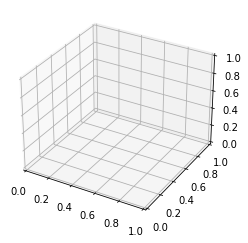

In [734]:
# Kinda cool video code to use for clustering visual
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(precipitation, temps, corn_price)
ax.view_init(elev=10., azim=30)
fig.show()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.scatter(inflation[12:],interest_rate[12:],natural_gas_prices, marker='o', s=20, alpha=0.8)
ax.set_xlabel("inflation")
ax.set_ylabel("interest_rate")
ax.set_zlabel("price")
for ii in range(0,360,1):
    ax.view_init(elev=10., azim=ii)
    plt.savefig("./movie/movie%d.png" % ii)

In [ ]:
# explain why the weather data seems like a reasonable option
# then go onto show the other predictors and why they are reasonable choices
# show it as a story